# Import Data

In [515]:
import pandas as pd

df_8=pd.read_csv('all_alpha_08.csv')
df_18=pd.read_csv('all_alpha_18.csv')
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


# Answer this Questions
* number of samples in each dataset
* number of columns in each dataset
* duplicate rows in each dataset
* datatypes of columns
* features with missing values
* number of non-null unique values for features in each dataset
* what those unique values are and counts for each

In [516]:
# number of samples in each dataset & number of columns in each dataset
df_8.shape , df_18.shape
#duplicate rows in each dataset
sum(df_8.duplicated()),sum(df_18.duplicated())
#datatypes of columns
df_8.dtypes,df_18.dtypes
# features with missing values
df_8.isna().any(),df_18.isna().any()
# rows with missing values
sum(df_8.isna().any(axis=1)),sum(df_18.isna().any(axis=1))
# number of non-null unique values for features in each dataset
df_8.nunique(),df_18.nunique()
# what those unique values are and counts for each
df_8['Air Pollution Score'].value_counts()

6      1471
7       521
2       112
3        85
9.5      80
6/6      32
3/3      27
9        23
1        22
8        15
7/7      12
0         3
6/4       1
Name: Air Pollution Score, dtype: int64


<h3 style='color:blue;'>1. Drop extraneous columns</h3>

Drop features that aren't consistent (not present in both datasets) or aren't relevant to our questions. Use pandas' drop function.

Columns to Drop:
* From 2008 dataset: 'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'
* From 2018 dataset: 'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'


In [517]:
# help(df_8.drop)
df_8.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'],axis=1,inplace=True)
df_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'],axis=1,inplace=True)

<h3 style='color:blue'>2. Rename Columns</h3>

* Change the "Sales Area" column label in the 2008 dataset to "Cert Region" for consistency.
* Rename all column labels to replace spaces with underscores and convert everything to lowercase. (Underscores can be much easier to work with in Python than spaces. For example, having spaces wouldn't allow you to use df.column_name instead of df['column_name'] to select columns or use query(). Being consistent with lowercase and underscores also helps make column names easy to remember.)


In [518]:
df_8.columns.values[6]='Cert Region'
df_8.rename(columns={"Sales Area":"Cert Region"})
df_8.columns
df_8.columns=df_8.columns.str.lower().str.replace(' ','_')
df_18.rename(columns=lambda x:x.strip().lower().replace(' ','_'),inplace=True)
df_8.columns==df_18.columns


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

# Filter, Drop Nulls, Dedupe
<h3 style='color:blue'>1. Filter</h3>
For consistency, only compare cars certified by California standards. Filter both datasets using query to select only rows where | is CA. Then, drop the cert_region columns, since it will no longer provide any useful information (we'll know every value is 'CA').

<h3 style='color:blue'>2. Drop Nulls</h3>
Drop any rows in both datasets that contain missing values.

<h3 style='color:blue'>3. Dedupe</h3>

Drop any duplicate rows in both datasets.

In [519]:
# filter
df_8.query('cert_region == "CA" ',inplace=True)
df_18.query('cert_region == "CA" ',inplace=True)
#Drop nulls
df_8.dropna(inplace=True)
df_18.dropna(inplace=True)
# print(df_8.isna().any(),df_18.isna().any())
#dedube
df_8.drop_duplicates(inplace=True)
df_18.drop_duplicates(inplace=True)
print(df_8.duplicated().any(),df_18.duplicated().any())

False False


# Inspecting and Fixing Data Types
* Fix cyl datatype
 - 2008: extract int from string.
 - 2018: convert float to int.
* Fix air_pollution_score datatype
 - 2008: convert string to float.
 - 2018: convert int to float.
 
note:
"If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."
* Fix city_mpg, hwy_mpg, cmb_mpg datatypes
 - 2008 and 2018: convert string to float.
 
note:
"If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."
* Fix greenhouse_gas_score datatype
 - 2008 and 2018: convert to float.


In [520]:
# Fix cyl datatype
df_8.dtypes,df_18.dtypes
df_8['cyl']=df_8['cyl'].apply(lambda x:int(x[1:3]) )
df_18['cyl']=df_18['cyl'].apply(lambda x:int(x) )


In [521]:
# Fix city_mpg, hwy_mpg, cmb_mpg datatypes
df_split_8=df_8[df_8['fuel'].str.contains('/')]
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']
df1=df_split_8.copy()
df2=df_split_8.copy()
for c in split_columns:
    df1[c]=df1[c].apply(lambda x:x.split("/")[0])
    df2[c]=df2[c].apply(lambda x:x.split("/")[1])
df_8.drop(df_split_8.index,inplace=True)
df_8=df_8.append(df1,ignore_index=True).append(df2,ignore_index=True)
# for df_18
df_split_18=df_18[df_18['fuel'].str.contains('/')]
split_columns = ['fuel',  'city_mpg', 'hwy_mpg', 'cmb_mpg']
df1=df_split_18.copy()
df2=df_split_18.copy()
for c in split_columns:
    df1[c]=df1[c].apply(lambda x:x.split("/")[0])
    df2[c]=df2[c].apply(lambda x:x.split("/")[1])
df_18.drop(df_split_18.index,inplace=True)
df_18=df_18.append(df1,ignore_index=True).append(df2,ignore_index=True)
# convert mpg columns to floats
mpg_columns = [  'city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in mpg_columns:
    df_18[c] = df_18[c].astype(float)
    df_8[c] = df_8[c].astype(float)
# df1.shape,df2.shape


In [522]:
df_8.greenhouse_gas_score.unique()

array(['4', '5', '6', '7', '0', '1', '3', '2', '8', '9', '10'],
      dtype=object)

In [523]:
# Fix air_pollution_score datatype
df_8['air_pollution_score']=df_8['air_pollution_score'].astype(float)
df_18['air_pollution_score']=df_18['air_pollution_score'].astype(float)

In [524]:
df_8.dtypes


model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score     object
smartway                 object
dtype: object

In [525]:
# Fix greenhouse_gas_score datatype
df_8.dtypes,df_18.dtypes
df_8['greenhouse_gas_score']=df_8['greenhouse_gas_score'].astype(int)
df_18['greenhouse_gas_score']=df_18['greenhouse_gas_score'].astype(int)
df_8.dtypes,df_18.dtypes

(model                    object
 displ                   float64
 cyl                       int64
 trans                    object
 drive                    object
 fuel                     object
 cert_region              object
 veh_class                object
 air_pollution_score     float64
 city_mpg                float64
 hwy_mpg                 float64
 cmb_mpg                 float64
 greenhouse_gas_score      int64
 smartway                 object
 dtype: object,
 model                    object
 displ                   float64
 cyl                       int64
 trans                    object
 drive                    object
 fuel                     object
 cert_region              object
 veh_class                object
 air_pollution_score     float64
 city_mpg                float64
 hwy_mpg                 float64
 cmb_mpg                 float64
 greenhouse_gas_score      int64
 smartway                 object
 dtype: object)

<h3 style='color:red'> Solution </h3>

```python
# Extract int from strings in the 2008 cyl column
df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(int)
# Check value counts for 2008 cyl column again to confirm the change
df_08['cyl'].value_counts()
# convert 2018 cyl column to int
df_18['cyl'] = df_18['cyl'].astype(int)

## Fix air_pollution_score,city_mpg, hwy_mpg, cmb_mpg datatype
# First, let's get all the hybrids in 2008
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08
# hybrids in 2018
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle
# Each one should look like this
df1
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])
# this dataframe holds info for the FIRST fuel type of the hybrid
# aka the values before the "/"s
df1
# this dataframe holds info for the SECOND fuel type of the hybrid
# aka the values before the "/"s
df2
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows
# drop the original hybrid rows
df_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
df_08 = df_08.append(new_rows, ignore_index=True)
# check that all the original hybrid rows with "/"s are gone
df_08[df_08['fuel'].str.contains('/')]
# create two copies of the 2018 hybrids dataframe, hb_18
df1 = hb_18.copy()
df2 = hb_18.copy()
# list of columns to split
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])
# append the two dataframes
new_rows = df1.append(df2)

# drop each hybrid row from the original 2018 dataframe
# do this by using Pandas drop function with hb_18's index
df_18.drop(hb_18.index, inplace=True)

# append new_rows to df_18
df_18 = df_18.append(new_rows, ignore_index=True)
# check that they're gone
df_18[df_18['fuel'].str.contains('/')]

## Fix greenhouse_gas_score datatype
# convert string to float for 2008 air pollution column
df_08.air_pollution_score = df_08.air_pollution_score.astype(float)
# convert int to float for 2018 air pollution column
df_18.air_pollution_score = df_18.air_pollution_score.astype(float)
```

# Exploring with Visuals


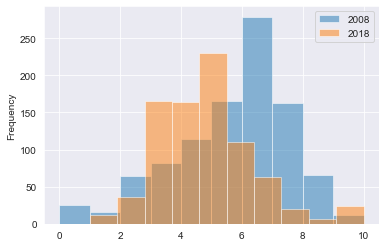

In [526]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

# Compare the distributions of greenhouse gas score in 2008 and 2018.
df_8.greenhouse_gas_score.plot(kind='hist',alpha=0.5,label='2008');
df_18.greenhouse_gas_score.plot(kind='hist',alpha=0.5,label='2018');
plt.legend();

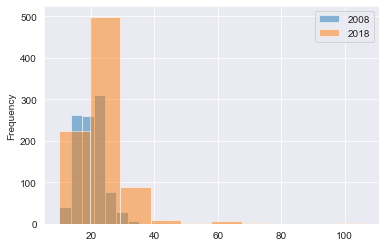

In [527]:
# How has the distribution of combined mpg changed from 2008 to 2018?
df_8.cmb_mpg.plot(kind='hist',alpha=0.5,label='2008');
df_18.cmb_mpg.plot(kind='hist',alpha=0.5,label='2018');
plt.legend();

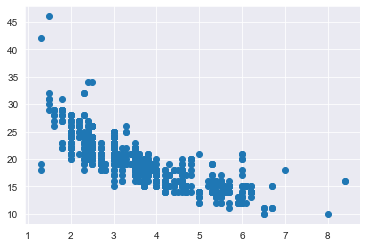

In [528]:
# Describe the correlation between displacement and combined mpg.
plt.scatter(df_8.displ,df_8.cmb_mpg);

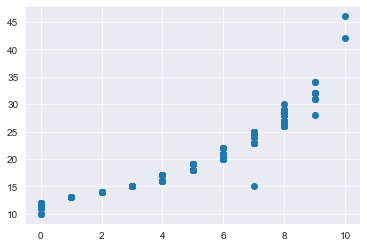

In [529]:
# Describe the correlation between greenhouse gas score and combined mpg.
plt.scatter(df_8.greenhouse_gas_score,df_8.cmb_mpg);

# Conclusions & Visuals

<h3 style='color:blue'>Q1: Are more unique models using alternative fuels in 2018 compared to 2008? By how much?
</h3>

Text(0, 0.5, 'number of models')

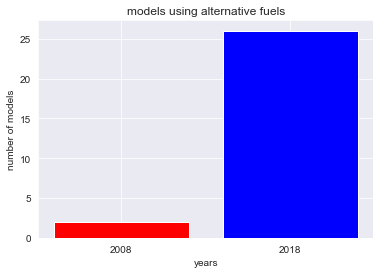

In [530]:
df_8['fuel'].value_counts()
df_18['fuel'].value_counts()
df1=df_8.query('fuel in ["CNG","ethanol"]').model.nunique()
df2=df_18.query('fuel in ["Electricity","Ethanol"]').model.nunique()
plt.bar(['2008','2018'],[df1,df2],color=['red','blue'])
plt.title('models using alternative fuels')
plt.xlabel('years')
plt.ylabel('number of models')

# len(df_18) 

In [531]:
df_18.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

<h3 style='color:blue'>Q2: How much have vehicle classes improved in fuel economy (increased in mpg)?</h3>


(Index(['SUV', 'large car', 'midsize car', 'minivan', 'pickup', 'small car',
        'station wagon', 'van'],
       dtype='object', name='veh_class'),
 Index(['large car', 'midsize car', 'minivan', 'pickup', 'small SUV',
        'small car', 'special purpose', 'standard SUV', 'station wagon'],
       dtype='object', name='veh_class'))

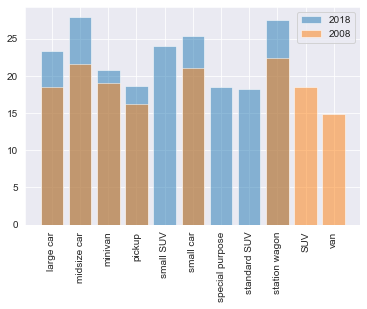

In [532]:
import numpy as np
df_8[['city_mpg','hwy_mpg','cmb_mpg']].mean(),df_18[['city_mpg','hwy_mpg','cmb_mpg']].mean()
# plt.bar(['2008','2018'],[df_8['cmb_mpg'].mean(),df_18['cmb_mpg'].mean()])
df_18['cmb_mpg'].mean()- df_8['cmb_mpg'].mean()
df_8['cmb_mpg'].min(),df_18['cmb_mpg'].min()
df_8['cmb_mpg'].max(),df_18['cmb_mpg'].max()
# plt.hist([df_8['cmb_mpg'].value_counts(),df_18['cmb_mpg'].value_counts()],label=["2018",'2008'])
# plt.legend()
df_8['cmb_mpg'].value_counts(),df_18['cmb_mpg'].value_counts()
df1=df_8.groupby('veh_class').cmb_mpg.mean()
df2=df_18.groupby('veh_class').cmb_mpg.mean()
plt.bar(df2.index,df2,alpha=0.5,label='2018')
plt.bar(df1.index,df1,alpha=0.5,label='2008')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.legend()

df1.index,df2.index

<h3 style='color:blue'>Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?</h3>

In [533]:
df_8['smartway'].unique()
df1=df_8[df_8['smartway']== 'yes']
df_18['smartway'].unique()

df2=df_18.query('smartway in ["Elite","Yes"]')
df1.describe(),df2.describe()
# plt.bar(df2.index,df2)

(            displ         cyl  air_pollution_score    city_mpg     hwy_mpg  \
 count  380.000000  380.000000           380.000000  380.000000  380.000000   
 mean     2.602895    4.826316             7.365789   20.984211   28.413158   
 std      0.623436    1.002025             1.148195    3.442672    3.075194   
 min      1.300000    4.000000             6.000000   17.000000   22.000000   
 25%      2.275000    4.000000             7.000000   19.000000   26.000000   
 50%      2.400000    4.000000             7.000000   20.000000   28.000000   
 75%      3.000000    6.000000             7.000000   22.000000   30.000000   
 max      5.000000    8.000000             9.500000   48.000000   45.000000   
 
           cmb_mpg  greenhouse_gas_score  
 count  380.000000            380.000000  
 mean    23.736842              6.868421  
 std      3.060379              0.827338  
 min     20.000000              6.000000  
 25%     22.000000              6.000000  
 50%     23.000000           

<h3 style='color:blue'>Q4: What features are associated with better fuel economy?</h3>

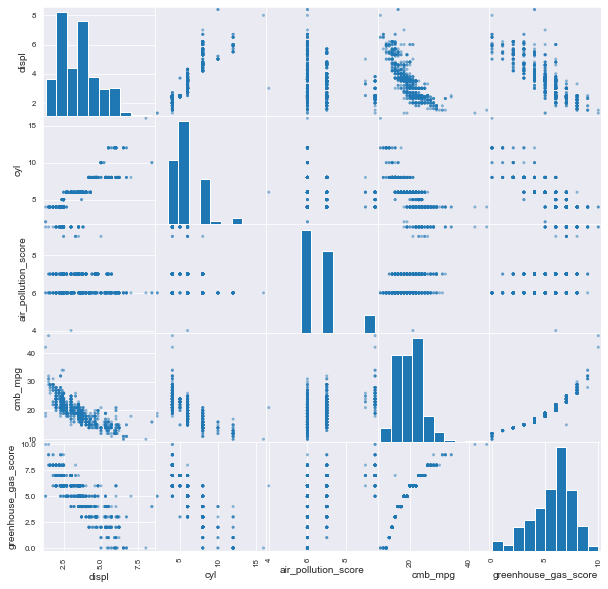

In [534]:
df1=df_8.drop(['city_mpg', 'hwy_mpg'],axis=1)
pd.plotting.scatter_matrix(df1,figsize=(10,10));


<h3 style='color:blue'>Q5: For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?</h3>

In [576]:
models=df_8.model.unique()
df2=df_18.query('model in {}'.format(list(models)))
df2.cmb_mpg.mean(),df_8.cmb_mpg.mean()
df5=df2.groupby('model').cmb_mpg.mean() - df_8.groupby('model').cmb_mpg.mean()
df5[df5.notna()].sort_values(ascending=False)

model
VOLVO XC 90             16.533333
CHEVROLET Malibu        10.666667
CHEVROLET Equinox        8.833333
AUDI S4                  8.500000
AUDI S5                  8.000000
                          ...    
TOYOTA Tundra           -0.150000
TOYOTA Sequoia          -0.250000
CHEVROLET Corvette      -0.250000
BMW 750i                -0.500000
MASERATI Granturismo    -1.000000
Name: cmb_mpg, Length: 72, dtype: float64

# Merging Datasets


<h3 style='color:blue'>1. Rename 2008 columns to distinguish from 2018 columns after the merge</h3>
To do this, use pandas' rename() with a lambda function. See example here. In the lambda function, take the first 10 characters of the column label and and concatenate it with _2008. (Only take the first 10 characters to prevent really long column names.)

The lambda function should look something like this: lambda x: x[:10] + "_2008"

In your rename, don't forget to specify the parameter columns= when you add the lambda function!

<h3 style='color:blue'>2. Perform inner merge</h3>
To answer the last question, we are only interested in how the same model of car has been updated and how the new model's mpg compares to the old model's mpg.

Perform an inner merge with the left on model_2008 and the right on model. See documentation for pandas' merge here.

In [536]:
# Rename 2008 columns to distinguish from 2018 columns after the merge
new_df_8=df_8.rename(columns=lambda x:x[:10]+'_2008')
new_df_8
# 2. Perform inner merge
df_combined =pd.merge(new_df_8,df_18,how='inner',left_on='model_2008',
    right_on='model')

In [539]:
df_combined.shape

(922, 28)

<h3 style='color:blue'>Q5: For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most?</h3>

Here are the steps for answering this question.

1. Create a new dataframe, model_mpg, that contain the mean combined mpg values in 2008 and 2018 for each unique model
To do this, group by model and find the mean cmb_mpg_2008 and mean cmb_mpg for each.

2. Create a new column, mpg_change, with the change in mpg
Subtract the mean mpg in 2008 from that in 2018 to get the change in mpg

3. Find the vehicle that improved the most
Find the max mpg change, and then use query or indexing to see what model it is!

In [555]:
df3=df_combined.groupby('model')[['cmb_mpg_2008','cmb_mpg']].mean()
df3['model_mpg']=df3['cmb_mpg']-df3['cmb_mpg_2008']
df3[ df3['model_mpg'] == df3.model_mpg.max() ]

,cmb_mpg_2008,cmb_mpg,model_mpg
model,,,
VOLVO XC 90,15.666667,32.2,16.533333


<h3 style='color:red'> Solution </h3>

```python
model_mpg = df.groupby('model').mean()[['cmb_mpg_2008', 'cmb_mpg']]
model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']
max_change = model_mpg['mpg_change'].max()
max_change
model_mpg[model_mpg['mpg_change'] == max_change]
idx = model_mpg.mpg_change.idxmax()
idx
model_mpg.loc[idx]
```